In [305]:
def lambdoid(Xi):
    return float(tanh(Xi/2)/(4*Xi))

In [306]:
def update_params(S_N,m_N,S_0,m_0,phi,t):
    phis = [vector(phi_n) for phi_n in phi]
    Xi2 = [phi_n*(S_N+m_N.outer_product(m_N))*phi_n for phi_n in phis]
    Xi = [float(sqrt(Xi2_n)) for Xi2_n in Xi2]
    
    L_xi = lower_bound(S_N,m_N,S_0,m_0,Xi)
    
    S_0_inv = S_0.inverse().apply_map(float)
    S_N_inv = (S_0_inv+2.*sum(lambdoid(Xi_n)*phi_n.outer_product(phi_n) 
                              for Xi_n,phi_n in zip(Xi,phis))).apply_map(float)
    S_N = S_N_inv.inverse().apply_map(float)
    m_N = (S_N*(S_0_inv*m_0+t.apply_map(lambda x:x-0.5)*phi)).apply_map(float)
    
    L = lower_bound(S_N,m_N,S_0,m_0,Xi)
    
    return S_N,m_N, L_xi, L

In [307]:
def lower_bound(S_N,m_N,S_0,m_0,Xi):
    S_N_inv = S_N.inverse()
    S_0_inv = S_0.inverse()
    term_1 = 0.5*float(log((S_N*S_0_inv).det()))+0.5*m_N*S_N_inv*m_N-0.5*m_0*S_0_inv*m_0
    term_2 = sum(-float(log(1+exp(-Xi_n)))-0.5*Xi_n+lambdoid(Xi_n)*Xi_n^2 for Xi_n in Xi)
    return term_1+term_2

In [308]:
A = vector(RR,[1,2,3])

In [309]:
phi = Matrix(RR, 60,3, lambda i,j: normalvariate(0, 1))

In [360]:
t = (phi*A).apply_map(lambda x: 1/(1+exp(-x)))

In [361]:
S_0 = matrix.identity(RR,3)*20
m_0 = vector(RR,[0,0,0])

In [362]:
S_N = S_0
m_N = m_0

In [363]:
Ls = []
for i in range(20):
    S_N,m_N, L_xi, L = update_params(S_N,m_N,S_0,m_0,phi,t)
    Ls.append(L_xi)
    Ls.append(L)

In [364]:
import matplotlib.pyplot as plt
%matplotlib inline

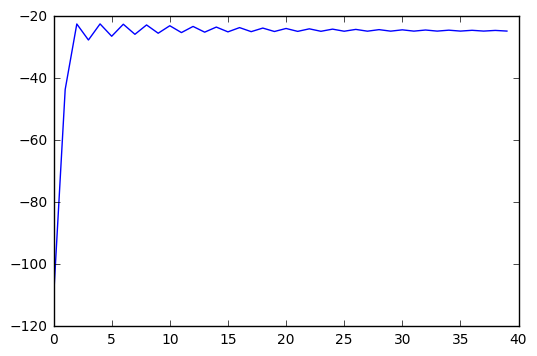

In [365]:
plt.plot(range(len(Ls)),Ls)

In [357]:
m_N

(1.0336855757826204, 2.096017673360709, 3.0947170456575765)

In [358]:
A

(1.00000000000000, 2.00000000000000, 3.00000000000000)

(array([  6.,   1.,   4.,   4.,   6.,   6.,  10.,   9.,   4.,   4.,   2.,
          2.,   0.,   1.,   1.]),
 array([-7.49418948, -6.3320729 , -5.16995632, -4.00783974, -2.84572316,
        -1.68360658, -0.52149   ,  0.64062658,  1.80274316,  2.96485974,
         4.12697632,  5.2890929 ,  6.45120948,  7.61332606,  8.77544264,
         9.93755922]),
 <a list of 15 Patch objects>)

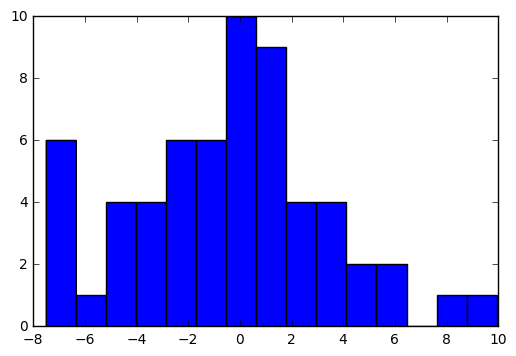

In [359]:
plt.hist(phi*m_N-t,bins=15)